In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
df_taxi = pd.read_csv('taxi_dropoff.csv')
df_fhv = pd.read_csv('fhv_dropoff.csv')

In [3]:
df_all = pd.concat([df_taxi, df_fhv], axis=0)
df_all.head()

,type,pu_month,pu_day,pu_hour,dolocationid,trips
0,green,1,1,0,10,4
1,green,1,1,0,101,1
2,green,1,1,0,102,1
3,green,1,1,0,106,3
4,green,1,1,0,107,6


In [4]:
df_all.shape

(1986394, 6)

In [5]:
#upload the shapefile; The 'location_i' column consists of all taxi zones within NYC + Newark airport
gdf_taxizone = gpd.read_file('https://data.cityofnewyork.us/api/geospatial/d3c5-ddgc?method=export&format=Shapefile')
gdf_taxizone.head()

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."


In [6]:
df_lockdown = df_all[((df_all['pu_month'] == 3) & (df_all['pu_day'] >= 16)) | ((df_all['pu_month'] == 4) & (df_all['pu_day'] <= 16))]
df_lockdown.head()

,type,pu_month,pu_day,pu_hour,dolocationid,trips
253846,green,3,16,0,112,1
253847,green,3,16,0,116,2
253848,green,3,16,0,123,1
253849,green,3,16,0,129,6
253850,green,3,16,0,130,2


In [17]:
df_lockdown_agg = df_lockdown.groupby(['dolocationid']).agg({'trips': 'sum'})
df_lockdown_agg['trips'] = df_lockdown_agg['trips'] / 32
df_lockdown_agg.head()

,trips
dolocationid,
1,464.93750
2,0.87500
3,650.34375
4,506.90625
5,43.59375


In [18]:
gdf_viz = gdf_taxizone.merge(df_lockdown_agg, left_on='location_i', right_on='dolocationid')
gdf_viz.head()

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry,trips
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",464.93750
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",0.87500
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",650.34375
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",506.90625
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562...",43.59375


<AxesSubplot:>

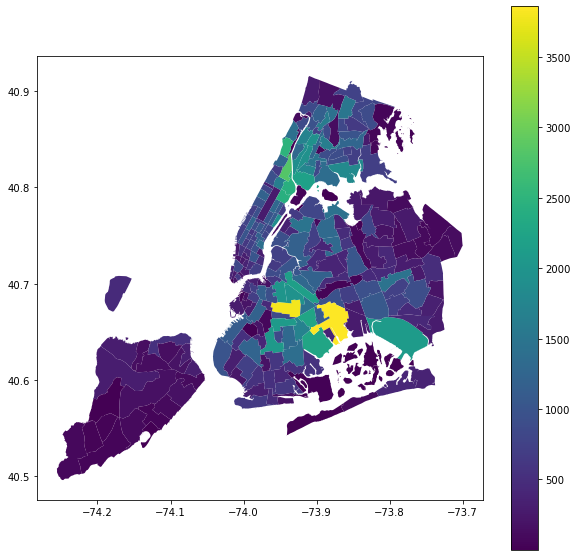

In [19]:
gdf_viz.plot(figsize=(10,10), column='trips', legend=True)

In [12]:
df_before_lockdown = df_all[(df_all['pu_month'] == 3) & (df_all['pu_day'] < 16)]
df_before_lockdown.head()

,type,pu_month,pu_day,pu_hour,dolocationid,trips
205021,green,3,1,0,10,5
205022,green,3,1,0,102,2
205023,green,3,1,0,106,3
205024,green,3,1,0,107,1
205025,green,3,1,0,11,1


In [20]:
df_before_lockdown_agg = df_before_lockdown.groupby(['dolocationid']).agg({'trips': 'sum'})
df_before_lockdown['trips'] = df_before_lockdown['trips'] / 15 # daily average
df_before_lockdown_agg.head()

<ipython-input-20-bb5b6722f97d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before_lockdown['trips'] = df_before_lockdown['trips'] / 15 # daily average


,trips
dolocationid,
1,60244
2,30
3,25000
4,46837
5,2610


In [21]:
gdf_viz_before = gdf_taxizone.merge(df_before_lockdown_agg, left_on='location_i', right_on='dolocationid')
gdf_viz_before.head()

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry,trips
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",60244
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",30
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",25000
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",46837
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562...",2610


<AxesSubplot:>

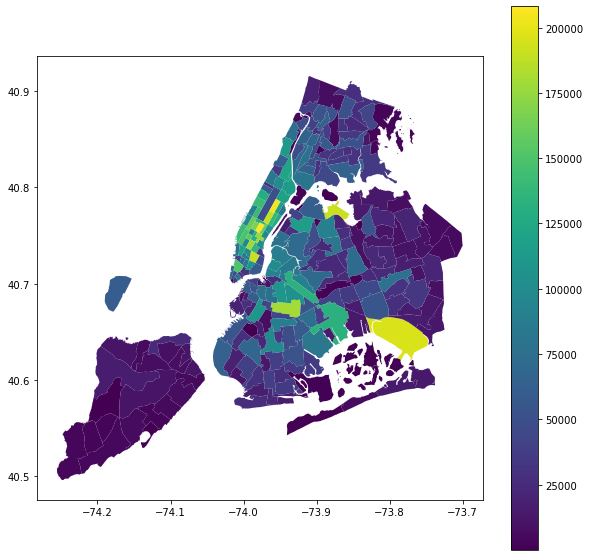

In [22]:
gdf_viz_before.plot(figsize=(10,10), column='trips', legend=True)